In [351]:
import numpy as np #untuk memanggil library numpy dialiaskan sebagai np
import cv2  #untuk memanggil library cv2
import matplotlib.image as im  #untuk memanggil library matplotlib
import matplotlib.pyplot as plt #untuk memanggil library matplotlib.pyplot dialiaskan sebagai plt
#Import Library

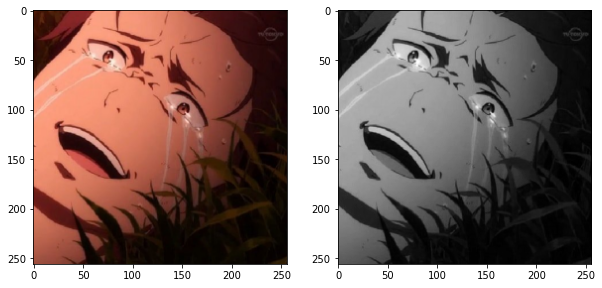

In [352]:
img=im.imread("mod4.jpeg")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(gray, cmap="gray")

In [353]:
lowpass = np.array ([[0.7071067812],  [0.7071067812]])
highpass = np.array ([[-0.7071067812], [0.7071067812]]) 

In [354]:
def padding (array):
    res=np.pad(array ,(0,7),mode="constant")
    return res

membuat sebuah fungsi untuk menambahkan zero padding di matriks gray image

In [355]:
def konvolusi_baris (arrayPadding,kernel,array):
    result=np.zeros(array.shape)
    row,col=array.shape
    for i in range(row):
        for j in range(col):
            for k in range(len(kernel.shape)):
                result[i][j]+=kernel[k]*arrayPadding[i,j+k]
    return result

membuat sebuah fungsi untuk melakukan konvolusi terhadap baris dengan parameter arrayPadding sebagai matriks dari citra asli yang sudah di tambahkan padding,kernel,array sebagai matriks dari citra asli

In [356]:
def konvolusi_kolom(arrayPadding,kernel,array):
    result=np.zeros(array.shape)
    row,col=array.shape
    for i in range(row):
        for j in range(col):
            for k in range(len(kernel.shape)):
                result[i][j]+=kernel[k]*arrayPadding[i+k,j]
    return result

membuat sebuah fungsi untuk melakukan konvolusi terhadap kolom dengan parameter arrayPadding sebagai matriks dari citra asli yang sudah di tambahkan padding,kernel,array sebagai matriks dari citra asli

In [357]:
def downSamplingKolom(array):
    row, col = array.shape
    row2 = int(row)                                                                         
    col2 = int(col/2)                                                        
                                                                                            
    result = np.zeros((row2,col2))
    for i in range (row2):
        x=0
        for j in range(col2):
            result[i][j] = array[i][x]
            x+=2
    return result

membuat sebuah fungsi untuk melakukan downsampling terhadap kolom yang mana fungsi ini akan mengambil nilai dari indeks genap dari suatu citra

In [358]:
def downSamplingBaris(array):
    row,col=array.shape
    row2=int(row/2)
    col2=int(col)
    result=np.zeros((row2,col2))
    x=0
    for i in range (row2):
        for j in range (col2) :
            result[i][j]=array[x][j]
        x+=2
    return result

membuat sebuah fungsi untuk melakukan downsampling terhadap baris yang mana fungsi ini akan mengambil nilai dari indeks genap dari suatu citra

In [359]:
def gabung (LL,LH,HL,HH):
    atas=np.concatenate((LL,LH),axis=1)
    bawah=np.concatenate((HL,HH),axis=1)
    return np.concatenate((atas,bawah),axis=0)

Membuat sebuah fungsi untuk menggabungkan LL LH HL HH menjadi satu matriks utuh

In [360]:
#filter Low pertama
grayPad = padding(gray) 
LLfiltered = konvolusi_baris(grayPad,lowpass,gray)
ds = downSamplingKolom(LLfiltered)#downsampling hasil filter Low pertama
dspad = padding(ds)#hasil dari downsampling di berikan padding
LLFiltered = konvolusi_kolom(dspad,lowpass,ds)
LL = downSamplingBaris(LLFiltered)# mendapatkan nilai LL

Melakukan proses pertama yaitu menambahkan padding pada suatu matriks citra lalu menkonvolusi terhadap baris dari matriks yang sudah di isi padding. setelah melakukan konvolusi maka melakukan downsampling terhadap kolom lalu mengulangi hal yang sama namun mengkonvolusi terhadap kolom dan down sampling terhadap baris, sehingga di dapat matriks LL

In [361]:
dspad = padding(ds)
LHFiltered = konvolusi_kolom(dspad,highpass,ds)
#kemudian di downsampling sekali lagi
LH = downSamplingBaris(LHFiltered)

In [362]:
#filter High Pertama
HFiltered = konvolusi_baris(grayPad,highpass,gray)
#downsampling hasil filter high pertama
highDS = downSamplingKolom(HFiltered)
#hasil dari downsampling kemudian diberikan padding
highDSpad = padding(highDS)
#kemudian di filter low lagi dan di downsampling pada baris untuk menghasilkan fitur LL, 
#dapat di filter high dan di downsampling pada baris untuk menghasilkan LH
HL = konvolusi_kolom(highDSpad,lowpass,highDS)
HH = konvolusi_kolom(highDSpad,highpass,highDS)

#kemudian di downsampling sekali lagi
HL = downSamplingBaris(HL)
HH = downSamplingBaris(HH)

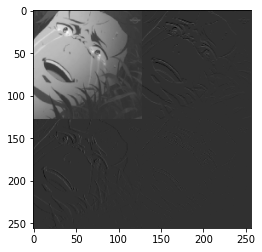

In [363]:
citraHasil = gabung(LL,LH,HL,HH)
plt.imshow(citraHasil,cmap="gray")